### Проект 4, часть 2


# Оценка прибыльности авиарейсов в Анапу

In [452]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timedelta

In [453]:
df = pd.read_csv('query_result_2021-10-11T11_32_48.026348Z.csv')

### Первичный осмотр датафрейма

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             127 non-null    int64  
 1   actual_departure      127 non-null    object 
 2   actual_arrival        127 non-null    object 
 3   model                 127 non-null    object 
 4   seat_count_for_plane  127 non-null    int64  
 5   sold_tickets          118 non-null    float64
 6   precent_of_seats      118 non-null    float64
 7   total_amount_tickets  118 non-null    float64
 8   fly_time_minutes      127 non-null    float64
 9   departure_city_name   127 non-null    object 
 10  arrival_city_name     127 non-null    object 
 11  arrival_airport_name  127 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.0+ KB


,flight_id,actual_departure,actual_arrival,model,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes,departure_city_name,arrival_city_name,arrival_airport_name
0,136119,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,Boeing 737-300,130,113.0,0.869231,1653000.0,101.0,Anapa,Moscow,Sheremetyevo International Airport
1,136120,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,Boeing 737-300,130,109.0,0.838462,1605400.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
2,136122,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,Boeing 737-300,130,97.0,0.746154,1431000.0,100.0,Anapa,Moscow,Sheremetyevo International Airport
3,136130,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,Boeing 737-300,130,107.0,0.823077,1556600.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
4,136131,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,Boeing 737-300,130,124.0,0.953846,1812800.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
5,136132,2017-02-15T10:09:00Z,2017-02-15T11:48:00Z,Boeing 737-300,130,116.0,0.892308,1714000.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
6,136135,2017-02-01T10:08:00Z,2017-02-01T11:48:00Z,Boeing 737-300,130,115.0,0.884615,1678600.0,100.0,Anapa,Moscow,Sheremetyevo International Airport
7,136146,2017-02-09T10:08:00Z,2017-02-09T11:48:00Z,Boeing 737-300,130,109.0,0.838462,1604200.0,100.0,Anapa,Moscow,Sheremetyevo International Airport
8,136159,2017-01-04T10:07:00Z,2017-01-04T11:45:00Z,Boeing 737-300,130,115.0,0.884615,1700600.0,98.0,Anapa,Moscow,Sheremetyevo International Airport
9,136164,2017-01-07T10:07:00Z,2017-01-07T11:46:00Z,Boeing 737-300,130,120.0,0.923077,1738400.0,99.0,Anapa,Moscow,Sheremetyevo International Airport


,flight_id,actual_departure,actual_arrival,model,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes,departure_city_name,arrival_city_name,arrival_airport_name
117,136888,2017-02-14T09:29:00Z,2017-02-14T10:19:00Z,Sukhoi Superjet-100,97,79.0,0.814433,626100.0,50.0,Anapa,Belgorod,Belgorod International Airport
118,136900,2017-02-01T09:30:00Z,2017-02-01T10:21:00Z,Sukhoi Superjet-100,97,97.0,1.000000,765300.0,51.0,Anapa,Belgorod,Belgorod International Airport
119,136907,2017-01-16T09:31:00Z,2017-01-16T10:22:00Z,Sukhoi Superjet-100,97,96.0,0.989691,759000.0,51.0,Anapa,Belgorod,Belgorod International Airport
120,136922,2017-02-11T09:27:00Z,2017-02-11T10:17:00Z,Sukhoi Superjet-100,97,76.0,0.783505,607800.0,50.0,Anapa,Belgorod,Belgorod International Airport
121,136927,2017-01-22T09:28:00Z,2017-01-22T10:19:00Z,Sukhoi Superjet-100,97,97.0,1.000000,765300.0,51.0,Anapa,Belgorod,Belgorod International Airport
122,136936,2017-01-02T09:28:00Z,2017-01-02T10:18:00Z,Sukhoi Superjet-100,97,82.0,0.845361,632400.0,50.0,Anapa,Belgorod,Belgorod International Airport
123,136937,2017-01-03T09:29:00Z,2017-01-03T10:19:00Z,Sukhoi Superjet-100,97,81.0,0.835052,626100.0,50.0,Anapa,Belgorod,Belgorod International Airport
124,136951,2017-02-02T09:28:00Z,2017-02-02T10:17:00Z,Sukhoi Superjet-100,97,90.0,0.927835,720600.0,49.0,Anapa,Belgorod,Belgorod International Airport
125,136953,2017-02-27T09:27:00Z,2017-02-27T10:17:00Z,Sukhoi Superjet-100,97,97.0,1.000000,765300.0,50.0,Anapa,Belgorod,Belgorod International Airport
126,136956,2017-02-04T09:33:00Z,2017-02-04T10:23:00Z,Sukhoi Superjet-100,97,96.0,0.989691,746400.0,50.0,Anapa,Belgorod,Belgorod International Airport


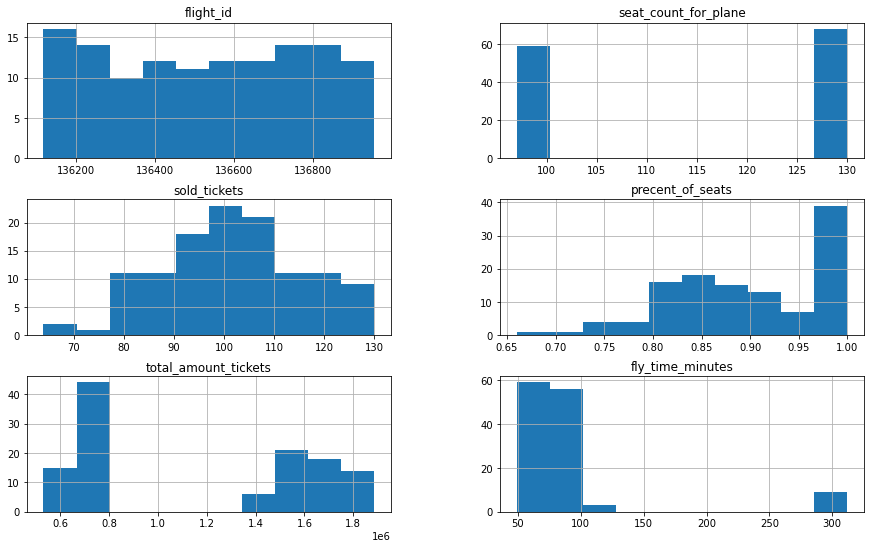

In [455]:
display(df.head(10)) 
display(df.tail(10))
df.hist(figsize=(15,9));

In [456]:
df[df.fly_time_minutes >200]

,flight_id,actual_departure,actual_arrival,model,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes,departure_city_name,arrival_city_name,arrival_airport_name
59,136511,2017-02-21T06:15:00Z,2017-02-21T11:25:00Z,Boeing 737-300,130,NaN,NaN,NaN,310.0,Anapa,Novokuznetsk,Spichenkovo Airport
60,136513,2017-02-28T06:13:00Z,2017-02-28T11:23:00Z,Boeing 737-300,130,NaN,NaN,NaN,310.0,Anapa,Novokuznetsk,Spichenkovo Airport
61,136514,2017-02-07T06:14:00Z,2017-02-07T11:13:00Z,Boeing 737-300,130,NaN,NaN,NaN,299.0,Anapa,Novokuznetsk,Spichenkovo Airport
62,136523,2017-01-10T06:14:00Z,2017-01-10T11:26:00Z,Boeing 737-300,130,NaN,NaN,NaN,312.0,Anapa,Novokuznetsk,Spichenkovo Airport
63,136540,2017-01-17T06:14:00Z,2017-01-17T11:21:00Z,Boeing 737-300,130,NaN,NaN,NaN,307.0,Anapa,Novokuznetsk,Spichenkovo Airport
64,136544,2017-01-31T06:10:00Z,2017-01-31T11:14:00Z,Boeing 737-300,130,NaN,NaN,NaN,304.0,Anapa,Novokuznetsk,Spichenkovo Airport
65,136546,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,Boeing 737-300,130,NaN,NaN,NaN,302.0,Anapa,Novokuznetsk,Spichenkovo Airport
66,136560,2017-01-24T06:13:00Z,2017-01-24T11:18:00Z,Boeing 737-300,130,NaN,NaN,NaN,305.0,Anapa,Novokuznetsk,Spichenkovo Airport
67,136567,2017-02-14T06:12:00Z,2017-02-14T11:23:00Z,Boeing 737-300,130,NaN,NaN,NaN,311.0,Anapa,Novokuznetsk,Spichenkovo Airport


In [457]:
df[df.arrival_city_name == 'Novokuznetsk'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 59 to 67
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             9 non-null      int64  
 1   actual_departure      9 non-null      object 
 2   actual_arrival        9 non-null      object 
 3   model                 9 non-null      object 
 4   seat_count_for_plane  9 non-null      int64  
 5   sold_tickets          0 non-null      float64
 6   precent_of_seats      0 non-null      float64
 7   total_amount_tickets  0 non-null      float64
 8   fly_time_minutes      9 non-null      float64
 9   departure_city_name   9 non-null      object 
 10  arrival_city_name     9 non-null      object 
 11  arrival_airport_name  9 non-null      object 
dtypes: float64(4), int64(2), object(6)
memory usage: 936.0+ bytes


В датафрейме имееются пустые данные о перелетах в Новокузнецк. Для нас они не релевантны так как нет инвормации о доходах с билетов

In [458]:
df.describe()

,flight_id,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes
count,127.000000,127.000000,118.000000,118.000000,1.180000e+02,127.000000
mean,136533.574803,114.669291,101.652542,0.899950,1.176506e+06,91.377953
std,252.498327,16.523699,14.295643,0.081705,4.794251e+05,64.377474
min,136119.000000,97.000000,64.000000,0.659794,5.310000e+05,49.000000
25%,136313.000000,97.000000,95.000000,0.835052,7.464000e+05,50.000000
50%,136540.000000,130.000000,97.000000,0.898454,1.081650e+06,99.000000
75%,136757.500000,130.000000,111.750000,0.989691,1.625850e+06,100.000000
max,136956.000000,130.000000,130.000000,1.000000,1.886000e+06,312.000000


In [459]:
df.actual_arrival = df.actual_arrival.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')) #перевожу колонки в формат datetime
df.actual_departure = df.actual_departure.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
df

,flight_id,actual_departure,actual_arrival,model,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes,departure_city_name,arrival_city_name,arrival_airport_name
0,136119,2017-01-03 10:08:00,2017-01-03 11:49:00,Boeing 737-300,130,113.0,0.869231,1653000.0,101.0,Anapa,Moscow,Sheremetyevo International Airport
1,136120,2017-02-24 10:07:00,2017-02-24 11:46:00,Boeing 737-300,130,109.0,0.838462,1605400.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
2,136122,2017-01-08 10:08:00,2017-01-08 11:48:00,Boeing 737-300,130,97.0,0.746154,1431000.0,100.0,Anapa,Moscow,Sheremetyevo International Airport
3,136130,2017-02-13 10:07:00,2017-02-13 11:46:00,Boeing 737-300,130,107.0,0.823077,1556600.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
4,136131,2017-01-28 10:07:00,2017-01-28 11:46:00,Boeing 737-300,130,124.0,0.953846,1812800.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,2017-01-02 09:28:00,2017-01-02 10:18:00,Sukhoi Superjet-100,97,82.0,0.845361,632400.0,50.0,Anapa,Belgorod,Belgorod International Airport
123,136937,2017-01-03 09:29:00,2017-01-03 10:19:00,Sukhoi Superjet-100,97,81.0,0.835052,626100.0,50.0,Anapa,Belgorod,Belgorod International Airport
124,136951,2017-02-02 09:28:00,2017-02-02 10:17:00,Sukhoi Superjet-100,97,90.0,0.927835,720600.0,49.0,Anapa,Belgorod,Belgorod International Airport
125,136953,2017-02-27 09:27:00,2017-02-27 10:17:00,Sukhoi Superjet-100,97,97.0,1.000000,765300.0,50.0,Anapa,Belgorod,Belgorod International Airport


In [460]:
df.sort_values('actual_departure')

,flight_id,actual_departure,actual_arrival,model,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes,departure_city_name,arrival_city_name,arrival_airport_name
82,136661,2017-01-01 09:27:00,2017-01-01 10:17:00,Sukhoi Superjet-100,97,96.0,0.989691,759000.0,50.0,Anapa,Belgorod,Belgorod International Airport
45,136420,2017-01-01 10:09:00,2017-01-01 11:47:00,Boeing 737-300,130,104.0,0.800000,1542000.0,98.0,Anapa,Moscow,Sheremetyevo International Airport
122,136936,2017-01-02 09:28:00,2017-01-02 10:18:00,Sukhoi Superjet-100,97,82.0,0.845361,632400.0,50.0,Anapa,Belgorod,Belgorod International Airport
52,136458,2017-01-02 10:07:00,2017-01-02 11:46:00,Boeing 737-300,130,110.0,0.846154,1568800.0,99.0,Anapa,Moscow,Sheremetyevo International Airport
65,136546,2017-01-03 06:13:00,2017-01-03 11:15:00,Boeing 737-300,130,NaN,NaN,NaN,302.0,Anapa,Novokuznetsk,Spichenkovo Airport
...,...,...,...,...,...,...,...,...,...,...,...,...
125,136953,2017-02-27 09:27:00,2017-02-27 10:17:00,Sukhoi Superjet-100,97,97.0,1.000000,765300.0,50.0,Anapa,Belgorod,Belgorod International Airport
23,136266,2017-02-27 10:08:00,2017-02-27 11:48:00,Boeing 737-300,130,108.0,0.830769,1566400.0,100.0,Anapa,Moscow,Sheremetyevo International Airport
60,136513,2017-02-28 06:13:00,2017-02-28 11:23:00,Boeing 737-300,130,NaN,NaN,NaN,310.0,Anapa,Novokuznetsk,Spichenkovo Airport
109,136844,2017-02-28 09:26:00,2017-02-28 10:16:00,Sukhoi Superjet-100,97,79.0,0.814433,575100.0,50.0,Anapa,Belgorod,Belgorod International Airport


Добавим данные о потреблении топлива каждым самолетом и о цене на топливо из интернета.

In [461]:
fuel_per_minute_kg = {'Boeing 737-300': 43.3333,
                   'Sukhoi Superjet-100': 31.066666}
fuel_for_kg_rub = {'Boeing 737-300': 32,
                   'Sukhoi Superjet-100': 32}


In [462]:
df['fuel_per_minute_kg'] = df['model'].map(fuel_per_minute_kg)
df['fuel_for_kg_rub'] = df['model'].map(fuel_for_kg_rub)

Для получения примерной суммы расходов использовались данные американской авиакомпании DeItaAirLines Inc. (источник: https://www.jsdrm.ru/jour/article/view/803). С учетом меньшей доли оплаты труда в России, доля расхода на топливо составляет примерно 35%, поэтому общие затраты вычисляю, поделив стоимость топлива на этот коэффициент.

In [463]:
df['rub_for_flight'] = df['fly_time_minutes']*df['fuel_per_minute_kg']*df['fuel_for_kg_rub']
df['rub_for_flight'] = df['rub_for_flight']/0.35 
df.head()

,flight_id,actual_departure,actual_arrival,model,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes,departure_city_name,arrival_city_name,arrival_airport_name,fuel_per_minute_kg,fuel_for_kg_rub,rub_for_flight
0,136119,2017-01-03 10:08:00,2017-01-03 11:49:00,Boeing 737-300,130,113.0,0.869231,1653000.0,101.0,Anapa,Moscow,Sheremetyevo International Airport,43.3333,32,400152.073143
1,136120,2017-02-24 10:07:00,2017-02-24 11:46:00,Boeing 737-300,130,109.0,0.838462,1605400.0,99.0,Anapa,Moscow,Sheremetyevo International Airport,43.3333,32,392228.269714
2,136122,2017-01-08 10:08:00,2017-01-08 11:48:00,Boeing 737-300,130,97.0,0.746154,1431000.0,100.0,Anapa,Moscow,Sheremetyevo International Airport,43.3333,32,396190.171429
3,136130,2017-02-13 10:07:00,2017-02-13 11:46:00,Boeing 737-300,130,107.0,0.823077,1556600.0,99.0,Anapa,Moscow,Sheremetyevo International Airport,43.3333,32,392228.269714
4,136131,2017-01-28 10:07:00,2017-01-28 11:46:00,Boeing 737-300,130,124.0,0.953846,1812800.0,99.0,Anapa,Moscow,Sheremetyevo International Airport,43.3333,32,392228.269714


Вычисляю прибль за каждый перелет

In [464]:
df['flight_benefit'] = df['total_amount_tickets'] - df['rub_for_flight'] 
# df['fly_benefit']=df['fly_benefit'].apply(lambda x: "{:.4f}".format(float(x)))
df

,flight_id,actual_departure,actual_arrival,model,seat_count_for_plane,sold_tickets,precent_of_seats,total_amount_tickets,fly_time_minutes,departure_city_name,arrival_city_name,arrival_airport_name,fuel_per_minute_kg,fuel_for_kg_rub,rub_for_flight,flight_benefit
0,136119,2017-01-03 10:08:00,2017-01-03 11:49:00,Boeing 737-300,130,113.0,0.869231,1653000.0,101.0,Anapa,Moscow,Sheremetyevo International Airport,43.333300,32,400152.073143,1.252848e+06
1,136120,2017-02-24 10:07:00,2017-02-24 11:46:00,Boeing 737-300,130,109.0,0.838462,1605400.0,99.0,Anapa,Moscow,Sheremetyevo International Airport,43.333300,32,392228.269714,1.213172e+06
2,136122,2017-01-08 10:08:00,2017-01-08 11:48:00,Boeing 737-300,130,97.0,0.746154,1431000.0,100.0,Anapa,Moscow,Sheremetyevo International Airport,43.333300,32,396190.171429,1.034810e+06
3,136130,2017-02-13 10:07:00,2017-02-13 11:46:00,Boeing 737-300,130,107.0,0.823077,1556600.0,99.0,Anapa,Moscow,Sheremetyevo International Airport,43.333300,32,392228.269714,1.164372e+06
4,136131,2017-01-28 10:07:00,2017-01-28 11:46:00,Boeing 737-300,130,124.0,0.953846,1812800.0,99.0,Anapa,Moscow,Sheremetyevo International Airport,43.333300,32,392228.269714,1.420572e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,2017-01-02 09:28:00,2017-01-02 10:18:00,Sukhoi Superjet-100,97,82.0,0.845361,632400.0,50.0,Anapa,Belgorod,Belgorod International Airport,31.066666,32,142019.044571,4.903810e+05
123,136937,2017-01-03 09:29:00,2017-01-03 10:19:00,Sukhoi Superjet-100,97,81.0,0.835052,626100.0,50.0,Anapa,Belgorod,Belgorod International Airport,31.066666,32,142019.044571,4.840810e+05
124,136951,2017-02-02 09:28:00,2017-02-02 10:17:00,Sukhoi Superjet-100,97,90.0,0.927835,720600.0,49.0,Anapa,Belgorod,Belgorod International Airport,31.066666,32,139178.663680,5.814213e+05
125,136953,2017-02-27 09:27:00,2017-02-27 10:17:00,Sukhoi Superjet-100,97,97.0,1.000000,765300.0,50.0,Anapa,Belgorod,Belgorod International Airport,31.066666,32,142019.044571,6.232810e+05


Визуализируем данные

<AxesSubplot:>

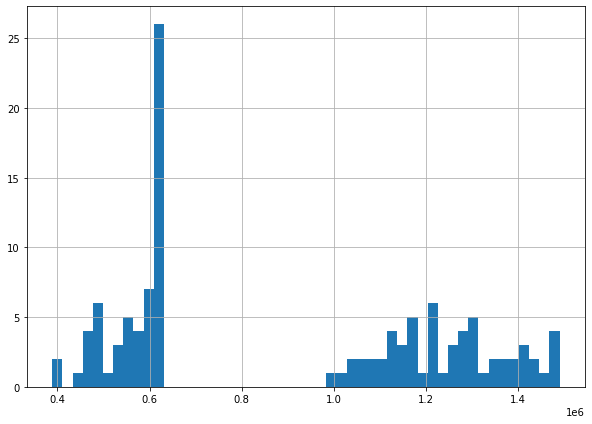

In [465]:
plt.rcParams['figure.figsize'] = (10,7)
df['flight_benefit'].hist(bins=50)

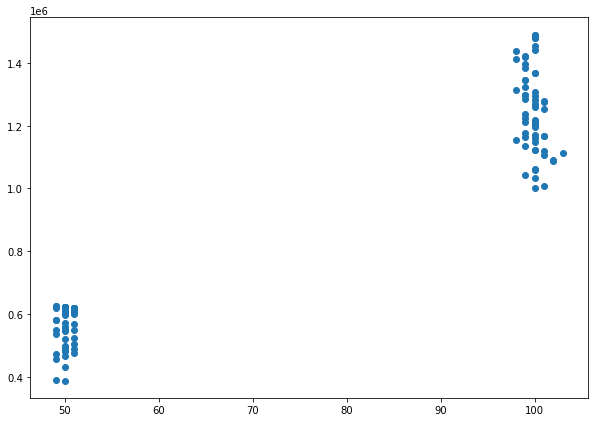

In [466]:
plt.scatter(df['fly_time_minutes'],df['flight_benefit'])

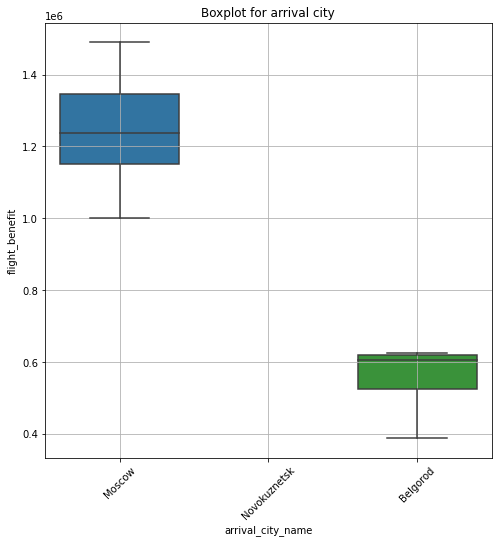

In [467]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.boxplot(x='arrival_city_name', y='flight_benefit', data=df,ax=ax)
plt.xticks(rotation=45)
plt.grid()
ax.set_title('Boxplot for arrival city')
plt.show();

На графиках видна большая разница в доходах между перелетами в Москву и в Белгород. Абсолютно все перелеты в Белгород намного менее прибыльны чем перелеты в Москву, поэтому разделю датафрейм на 2 по городам и поближе рассмотрю каждый из них.

Также нужно учесть что вместительность самолета летающего в Белгород меньше чем у самолета летающего в Москву (разницу во времени перелета можно считать несущественной).Поэтому добавлю новую колонку с прибылью в расчете на одно место в самолете и проделаю тот же анализ с ней. 

In [468]:
df['benefit_per_seat'] = df['flight_benefit']/df['seat_count_for_plane']
belgorod = df[df['arrival_city_name']=='Belgorod']
moscow = df[df['arrival_city_name'] == 'Moscow']

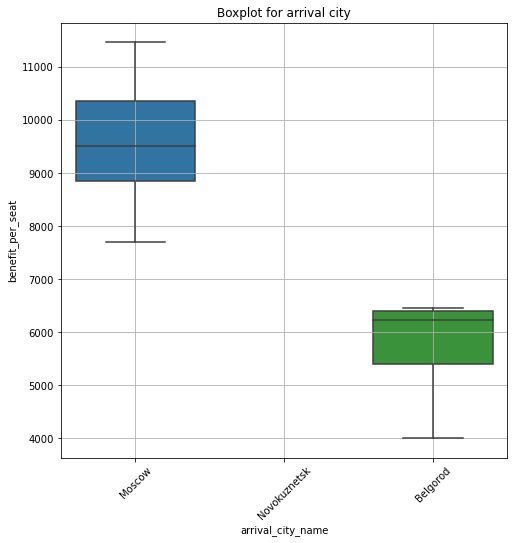

In [469]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.boxplot(x='arrival_city_name', y='benefit_per_seat', data=df,ax=ax)
plt.xticks(rotation=45)
plt.grid()
ax.set_title('Boxplot for arrival city')
plt.show();

In [470]:
df.arrival_city_name[df['flight_benefit']< df.flight_benefit.mean()].value_counts() 

Belgorod    59
Name: arrival_city_name, dtype: int64

Все перелеты которые были меньше прибыльными чем средняя 
прибыль по датафрейму были в Белгород

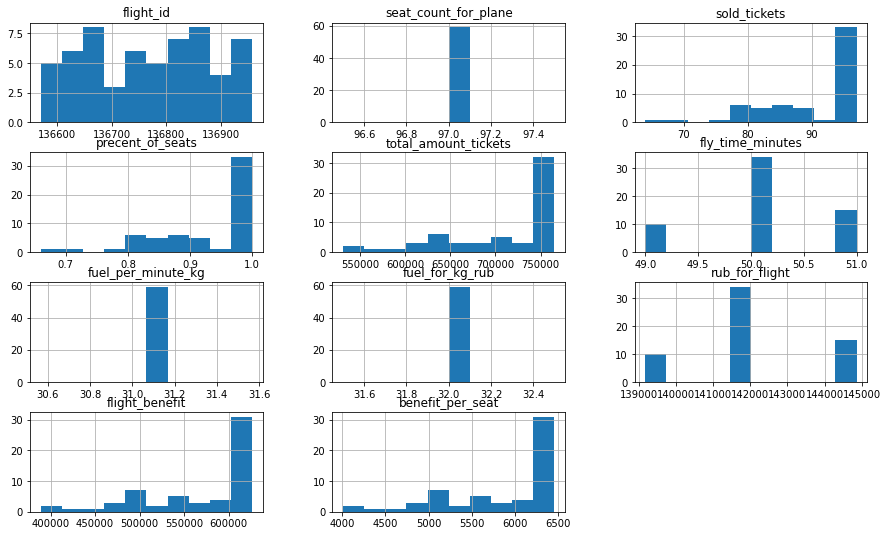

In [471]:
belgorod.hist(figsize=(15,9));

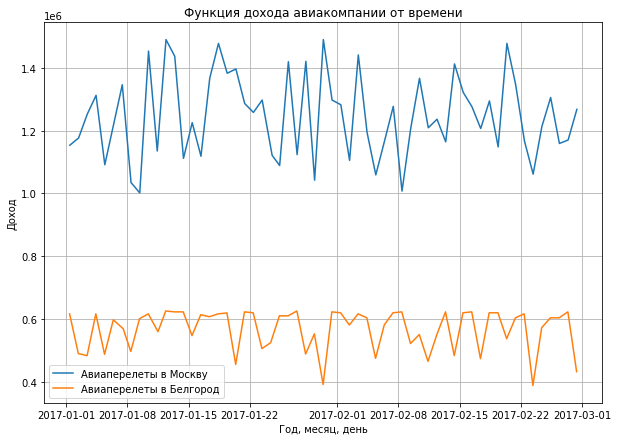

In [472]:
moscow = moscow.sort_values(by='actual_departure')
belgorod =  belgorod.sort_values(by='actual_departure')
plt.plot(moscow.actual_departure, moscow.flight_benefit, label = 'Авиаперелеты в Москву')
plt.plot(belgorod.actual_departure, belgorod.flight_benefit, label = 'Авиаперелеты в Белгород')

plt.grid()
plt.xlabel('Год, месяц, день')
plt.ylabel('Доход')
plt.title('Функция дохода авиакомпании от времени')
plt.legend();

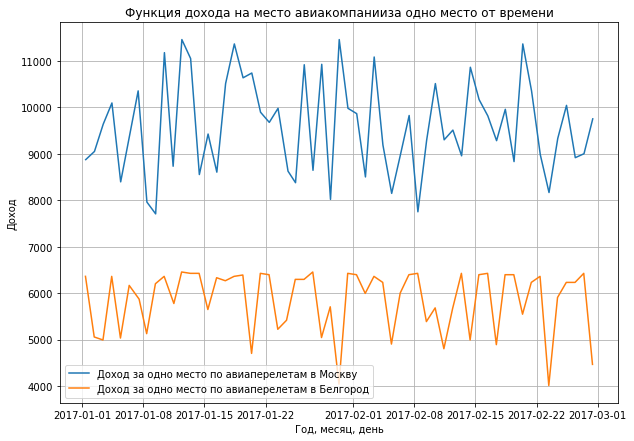

In [473]:
plt.plot(moscow.actual_departure, moscow.benefit_per_seat, label = 'Доход за одно место по авиаперелетам в Москву')
plt.plot(belgorod.actual_departure, belgorod.benefit_per_seat, label = 'Доход за одно место по авиаперелетам в Белгород')
plt.grid()
plt.xlabel('Год, месяц, день')
plt.ylabel('Доход')
plt.title('Функция дохода на место авиакомпанииза одно место от времени')
plt.legend();

Из графика дохода по времени видно, что прибыли рейсов на каждом направлении отличаются значительно меньше, чем между направлениями.

In [474]:
(len(moscow[moscow.flight_benefit < moscow.flight_benefit.mean()*0.9]),
len(belgorod[belgorod.flight_benefit < belgorod.flight_benefit.mean()*0.9]))

(12, 14)

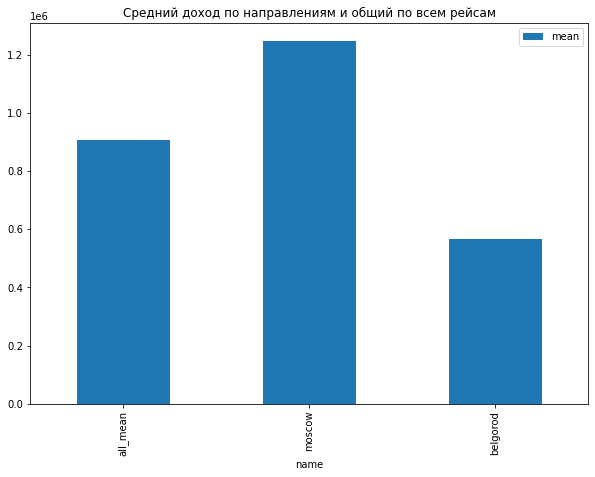

In [475]:
df_all_mean = pd.DataFrame(data =  {'name':  ['all_mean', 'moscow', 'belgorod'],
                                    'mean':  [round(df.flight_benefit.mean()),
                                              round(moscow.flight_benefit.mean()),
                                              round(belgorod.flight_benefit.mean())] 
                                    })
df_all_mean.plot(x='name', y='mean', kind="bar", title='Средний доход по направлениям и общий по всем рейсам');

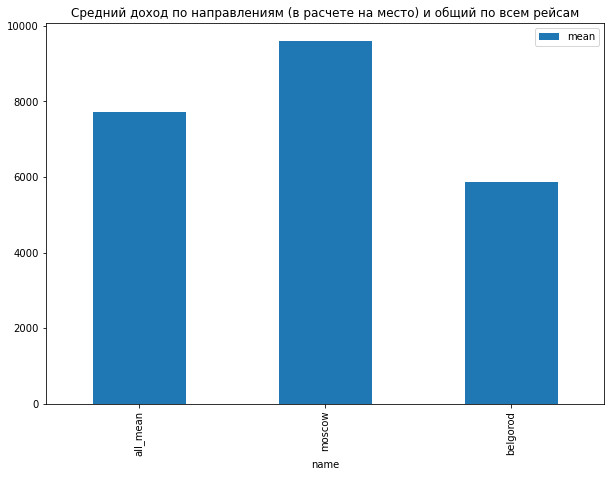

In [476]:
df_all_m = pd.DataFrame(data =  {'name':  ['all_mean', 'moscow', 'belgorod'],
                                    'mean':  [round(df.benefit_per_seat.mean()),
                                              round(moscow.benefit_per_seat.mean()),
                                              round(belgorod.benefit_per_seat.mean())] 
                                    }) 
df_all_m.plot(x='name', y='mean', kind="bar", title='Средний доход по направлениям (в расчете на место) и общий по всем рейсам');

In [477]:
print('Приблизительная средняя прибыльность всех рейсов:', round(df.flight_benefit.mean()/1000),'тысяч рублей' )
print('Приблизительная средняя прибыльность рейсов в Белгород:', round(belgorod.flight_benefit.mean()/1000),'тысяч рублей' )
print('Приблизительная средняя прибыльность рейсов в Mоскву:', round(moscow.flight_benefit.mean()/1000),'тысяч рублей' )


Приблизительная средняя прибыльность всех рейсов: 908 тысяч рублей
Приблизительная средняя прибыльность рейсов в Белгород: 568 тысяч рублей
Приблизительная средняя прибыльность рейсов в Mоскву: 1247 тысяч рублей


In [478]:
print('id всех перелетов в Белгород', list(belgorod.flight_id))

id всех перелетов в Белгород [136661, 136936, 136937, 136819, 136645, 136706, 136632, 136609, 136733, 136586, 136855, 136758, 136871, 136781, 136709, 136907, 136669, 136649, 136654, 136887, 136755, 136927, 136767, 136838, 136571, 136720, 136757, 136678, 136729, 136642, 136869, 136900, 136951, 136672, 136956, 136823, 136754, 136841, 136600, 136666, 136769, 136922, 136861, 136857, 136888, 136605, 136875, 136620, 136827, 136815, 136660, 136612, 136778, 136807, 136780, 136630, 136802, 136953, 136844]


# Вывод

1. Как видно из анализа, все зимние перелеты в Белгород менее прибыльны чем перелеты в Москву. Если учесть что данные о затратах авиакомпании взяты из открытых источников и могут отличаться от реальных затрат, эти перелеты могут приносить убыток. 
2. Однако просто отменить все перелеты в одном направлении может оказаться не лучшим решением. Следует рассмотреть возможность сократить количество перелетов в Белгород при повышении цены на билеты.
3. Данные по полетам в Новокузнецк не оценивались из-за отсутствия информации.
